Spaceship Titanic

Dataset Description

🔲PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.

🔲HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.

🔲CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.

🔲Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.

🔲Destination - The planet the passenger will be debarking to.

🔲Age - The age of the passenger.

🔲VIP - Whether the passenger has paid for special VIP service during the voyage.

🔲RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.

🔲Name - The first and last names of the passenger.

🔶Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import mode
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import warnings
from xgboost import XGBClassifier
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("train.csv")

EDA

In [3]:
df.head(20)

PassengerId HomePlanet CryoSleep  Cabin    Destination   Age    VIP  \
0      0001_01     Europa     False  B/0/P    TRAPPIST-1e  39.0  False   
1      0002_01      Earth     False  F/0/S    TRAPPIST-1e  24.0  False   
2      0003_01     Europa     False  A/0/S    TRAPPIST-1e  58.0   True   
3      0003_02     Europa     False  A/0/S    TRAPPIST-1e  33.0  False   
4      0004_01      Earth     False  F/1/S    TRAPPIST-1e  16.0  False   
5      0005_01      Earth     False  F/0/P  PSO J318.5-22  44.0  False   
6      0006_01      Earth     False  F/2/S    TRAPPIST-1e  26.0  False   
7      0006_02      Earth      True  G/0/S    TRAPPIST-1e  28.0  False   
8      0007_01      Earth     False  F/3/S    TRAPPIST-1e  35.0  False   
9      0008_01     Europa      True  B/1/P    55 Cancri e  14.0  False   
10     0008_02     Europa      True  B/1/P    TRAPPIST-1e  34.0  False   
11     0008_03     Europa     False  B/1/P    55 Cancri e  45.0  False   
12     0009_01       Mars     False  F/1/P    TRAPPIST-1e  32.0  False   
13     0010_01      Earth     False  G/1/S    TRAPPIST-1e  48.0  False   
14     0011_01      Earth     False  F/2/P    TRAPPIST-1e  28.0  False   
15     0012_01      Earth     False    NaN    TRAPPIST-1e  31.0  False   
16     0014_01       Mars     False  F/3/P    55 Cancri e  27.0  False   
17     0015_01      Earth     False  F/4/P    55 Cancri e  24.0  False   
18     0016_01       Mars      True  F/5/P    TRAPPIST-1e  45.0  False   
19     0017_01      Earth     False  G/0/P    TRAPPIST-1e   0.0  False   

    RoomService  FoodCourt  ShoppingMall     Spa  VRDeck                Name  \
0           0.0        0.0           0.0     0.0     0.0     Maham Ofracculy   
1         109.0        9.0          25.0   549.0    44.0        Juanna Vines   
2          43.0     3576.0           0.0  6715.0    49.0       Altark Susent   
3           0.0     1283.0         371.0  3329.0   193.0        Solam Susent   
4         303.0       70.0         151.0   565.0     2.0   Willy Santantines   
5           0.0      483.0           0.0   291.0     0.0   Sandie Hinetthews   
6          42.0     1539.0           3.0     0.0     0.0  Billex Jacostaffey   
7           0.0        0.0           0.0     0.0     NaN  Candra Jacostaffey   
8           0.0      785.0          17.0   216.0     0.0       Andona Beston   
9           0.0        0.0           0.0     0.0     0.0      Erraiam Flatic   
10          0.0        0.0           NaN     0.0     0.0      Altardr Flatic   
11         39.0     7295.0         589.0   110.0   124.0       Wezena Flatic   
12         73.0        0.0        1123.0     0.0   113.0        Berers Barne   
13        719.0        1.0          65.0     0.0    24.0      Reney Baketton   
14          8.0      974.0          12.0     2.0     7.0     Elle Bertsontry   
15         32.0        0.0         876.0     0.0     0.0       Justie Pooles   
16       1286.0      122.0           NaN     0.0     0.0         Flats Eccle   
17          0.0        1.0           0.0     0.0   637.0     Carry Hughriend   
18          0.0        0.0           0.0     0.0     0.0          Alus Upead   
19          0.0        0.0           0.0     0.0     0.0       Lyde Brighttt   

    Transported  
0         False  
1          True  
2         False  
3         False  
4          True  
5          True  
6          True  
7          True  
8          True  
9          True  
10         True  
11         True  
12         True  
13        False  
14         True  
15        False  
16        False  
17        False  
18         True  
19         True

In [4]:
len(df["Cabin"].unique())

6561

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [6]:
df.describe()

Age   RoomService     FoodCourt  ShoppingMall           Spa  \
count  8514.000000   8512.000000   8510.000000   8485.000000   8510.000000   
mean     28.827930    224.687617    458.077203    173.729169    311.138778   
std      14.489021    666.717663   1611.489240    604.696458   1136.705535   
min       0.000000      0.000000      0.000000      0.000000      0.000000   
25%      19.000000      0.000000      0.000000      0.000000      0.000000   
50%      27.000000      0.000000      0.000000      0.000000      0.000000   
75%      38.000000     47.000000     76.000000     27.000000     59.000000   
max      79.000000  14327.000000  29813.000000  23492.000000  22408.000000   

             VRDeck  
count   8505.000000  
mean     304.854791  
std     1145.717189  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%       46.000000  
max    24133.000000

In [7]:
df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [8]:
X = df.drop(columns=["Transported"],axis=1)
y = df["Transported"]

In [9]:
categorical_features = [feature for feature in X if X[feature].dtype == 'O']
numerical_features = [feature for feature in X if X[feature].dtype != 'O' and feature != "Transported"]

In [10]:
categorical_features

['PassengerId',
 'HomePlanet',
 'CryoSleep',
 'Cabin',
 'Destination',
 'VIP',
 'Name']

In [11]:
#numerical_features.append("Transported")
numerical_features


['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

Correlation Matrix for Just Numerical Features

In [12]:
correlation_matrix = df[numerical_features].corr()

plt.figure(figsize=(30,30), dpi =500)
sns.heatmap(correlation_matrix,annot=True,fmt=".2f", linewidth=.5)
plt.show()

TARGET DISTRIBUTION

Text(0, 0.5, '# of Passengers')

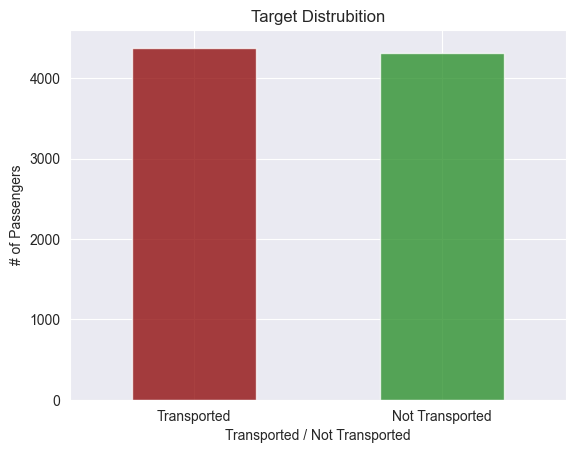

In [13]:
sns.set_style("darkgrid")
ax = y.value_counts().plot(kind="bar",alpha = 0.75,color = ['darkred','forestgreen'])
ax.set_xticklabels(['Transported', 'Not Transported'],rotation = 0);
ax.set_title("Target Distrubition")
ax.set_xlabel("Transported / Not Transported")
ax.set_ylabel("# of Passengers")


Data is not imbalanced for target variable

NUMERICAL FEATURES

Numerical Feature Distributions

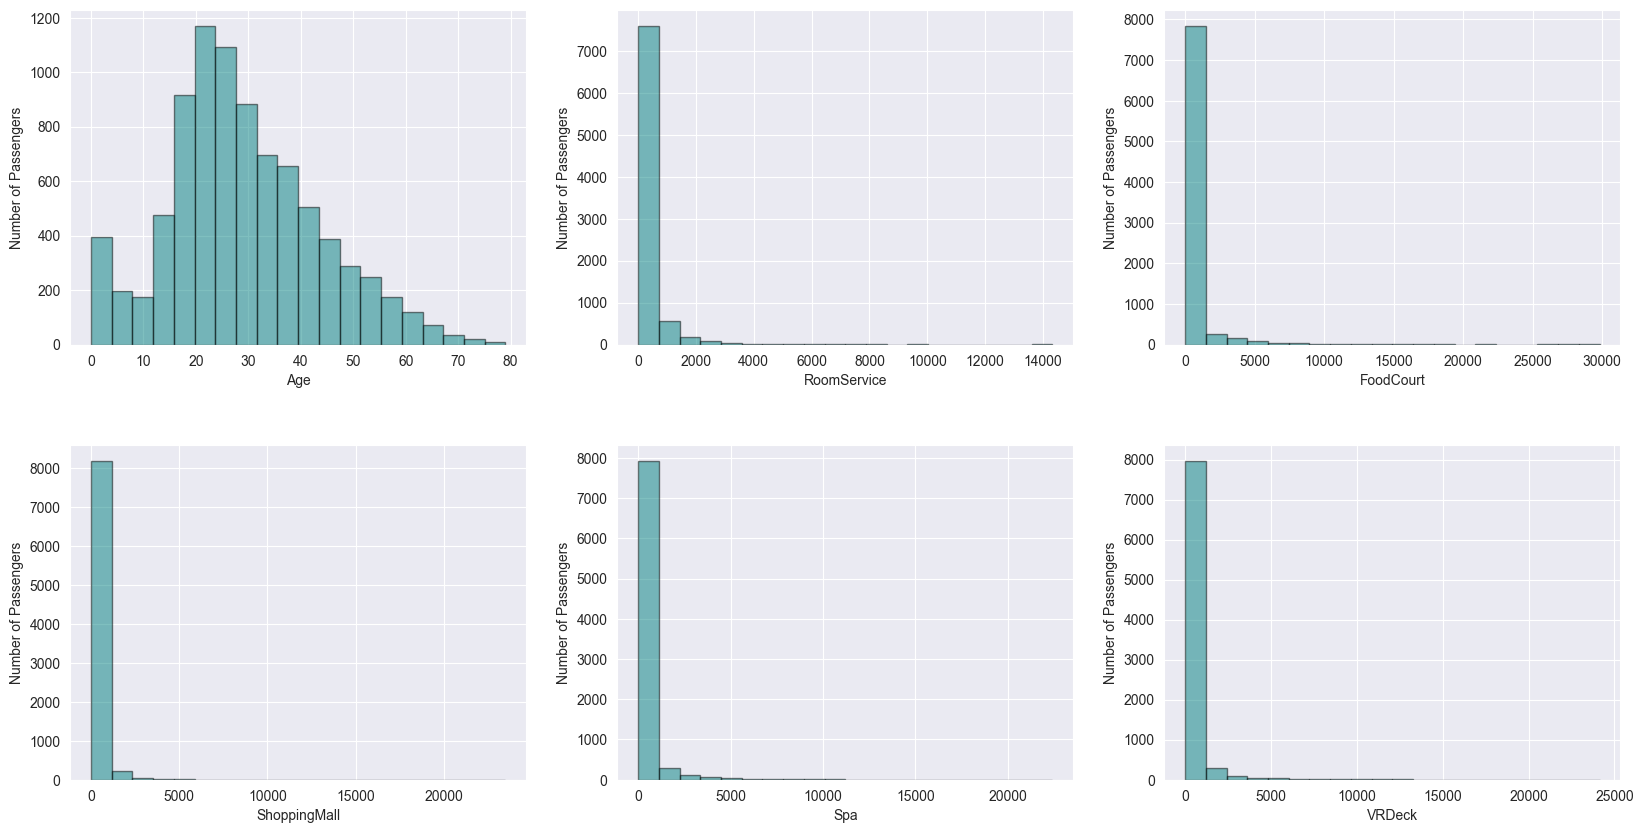

In [14]:
sns.set_style('darkgrid')
fig = plt.figure(figsize = (20,10))
fig.subplots_adjust(hspace = .30)

no = 1
for feature in numerical_features:
    ax = fig.add_subplot(2,3,no)
    data = X[numerical_features].copy()
    ax.hist(data[feature], bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
    ax.set_xlabel(feature)
    ax.set_ylabel("Number of Passengers")
    no += 1

plt.show()
    

Bin size

Numerical Features X Target

Text(0.5, 1.0, 'Age X Target')

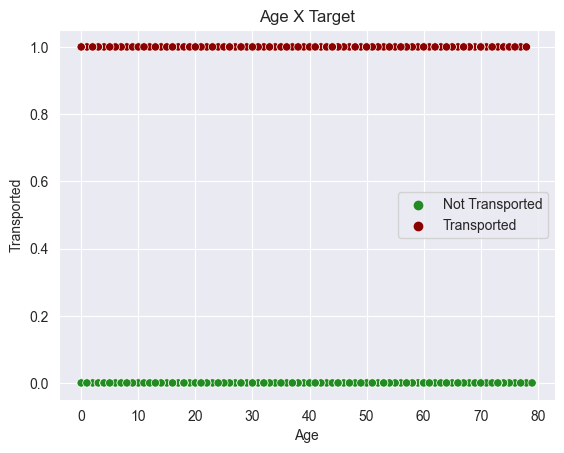

In [15]:
sns.set_style("darkgrid")
color_map = {
    False : "forestgreen",
    True : "darkred"
}
ax = sns.scatterplot(y=df["Transported"],x=df["Age"],hue=df["Transported"],palette=color_map)


handles, labels  =  ax.get_legend_handles_labels()
ax.legend(handles,["Not Transported","Transported"])
plt.title("Age X Target")





Text(0.5, 1.0, 'RoomService X Target')

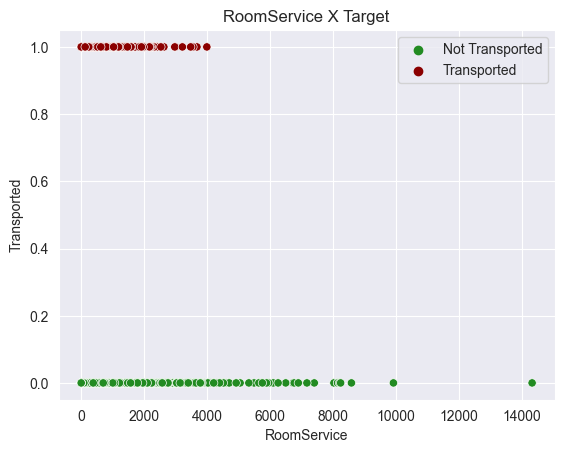

In [16]:
sns.set_style("darkgrid")
color_map = {
    False : "forestgreen",
    True : "darkred"
}
ax = sns.scatterplot(y=df["Transported"],x=df["RoomService"],hue=df["Transported"],palette=color_map);


handles, labels  =  ax.get_legend_handles_labels()
ax.legend(handles,["Not Transported","Transported"])
plt.title("RoomService X Target")


Text(0.5, 1.0, 'FoodCourt X Target')

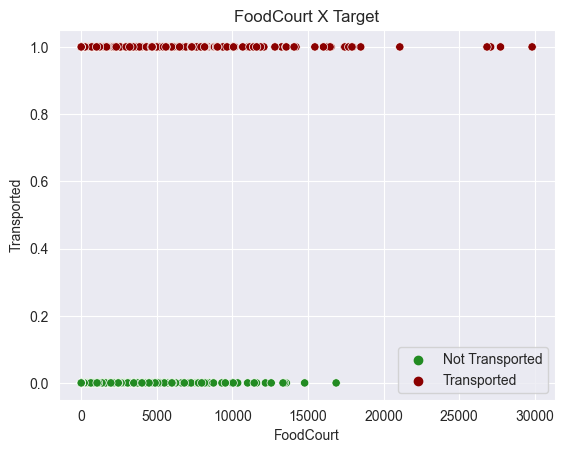

In [17]:
sns.set_style("darkgrid")
color_map = {
    False : "forestgreen",
    True : "darkred"
}
ax = sns.scatterplot(y=df["Transported"],x=df["FoodCourt"],hue=df["Transported"],palette=color_map);


handles, labels  =  ax.get_legend_handles_labels()
ax.legend(handles,["Not Transported","Transported"])
plt.title("FoodCourt X Target")


Text(0.5, 1.0, 'ShoppingMall X Target')

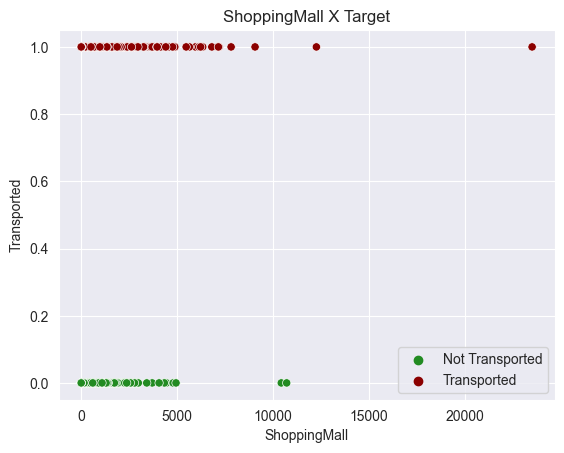

In [18]:
sns.set_style("darkgrid")
color_map = {
    False : "forestgreen",
    True : "darkred"
}
ax = sns.scatterplot(y=df["Transported"],x=df["ShoppingMall"],hue=df["Transported"],palette=color_map);


handles, labels  =  ax.get_legend_handles_labels()
ax.legend(handles,["Not Transported","Transported"])
plt.title("ShoppingMall X Target")


Text(0.5, 1.0, 'Spa X Target')

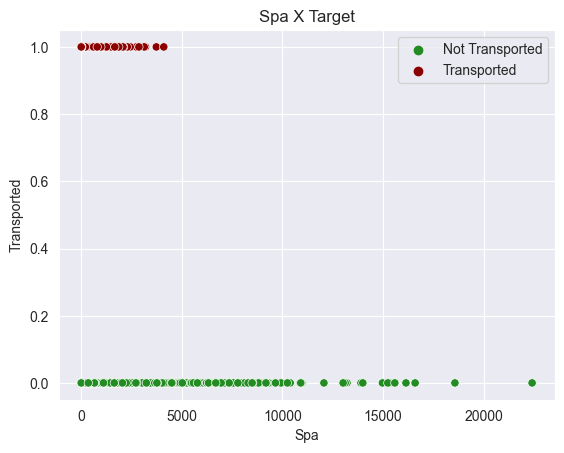

In [19]:
sns.set_style("darkgrid")
color_map = {
    False : "forestgreen",
    True : "darkred"
}
ax = sns.scatterplot(y=df["Transported"],x=df["Spa"],hue=df["Transported"],palette=color_map);


handles, labels  =  ax.get_legend_handles_labels()
ax.legend(handles,["Not Transported","Transported"])
plt.title("Spa X Target")


Text(0.5, 1.0, 'VRDeck X Target')

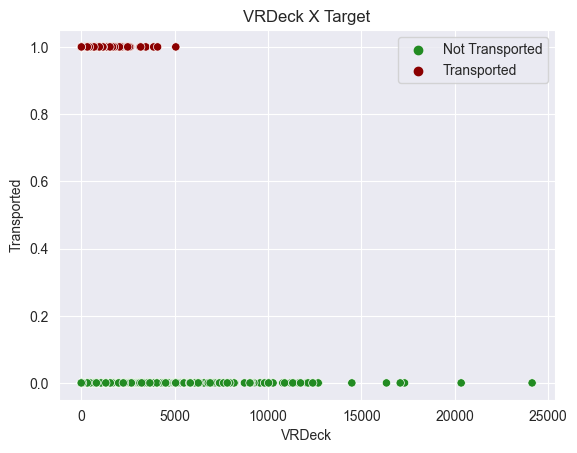

In [20]:
sns.set_style("darkgrid")
color_map = {
    False : "forestgreen",
    True : "darkred"
}
ax = sns.scatterplot(y=df["Transported"],x=df["VRDeck"],hue=df["Transported"],palette=color_map)


handles, labels  =  ax.get_legend_handles_labels()
ax.legend(handles,["Not Transported","Transported"])
plt.title("VRDeck X Target")


Age X Target (Age grouped)

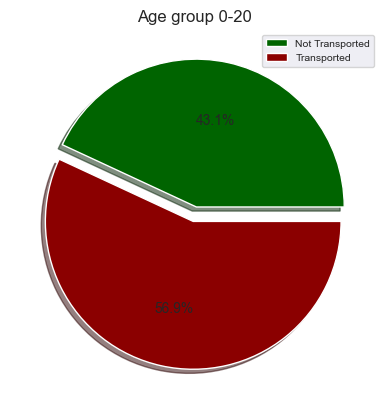

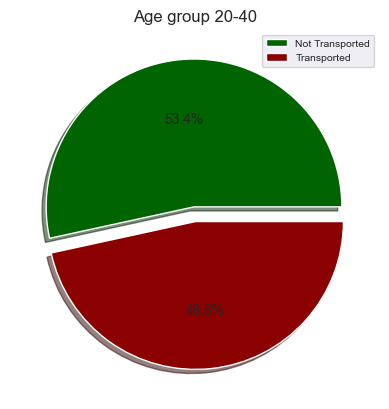

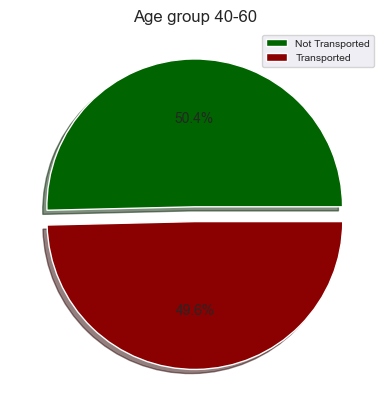

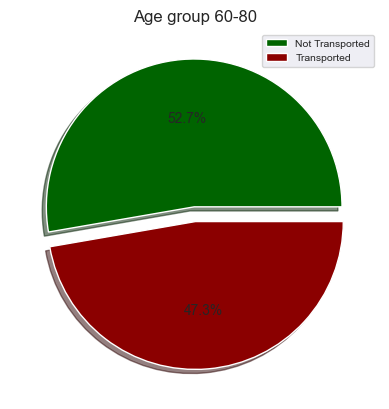

In [21]:
age_classes_pie = df[["Age","Transported"]]
group_min = 0
group_max = 20
for i in range(4):
    new = age_classes_pie.copy()
    new = new.loc[(new["Age"] > group_min) & (new["Age"] < group_max)]

    new.groupby("Transported").size().plot(kind="pie",colors=['darkgreen', 'darkred'],title="Age group {}-{}".format(group_min,group_max),ylabel='', labeldistance=None,autopct='%1.1f%%', shadow=True, explode=[0.05, 0.05])

    plt.legend(["Not Transported","Transported"],prop = {"size":7.5})   
                                        
    group_max += 20
    group_min += 20
    plt.show()

Age X Planet

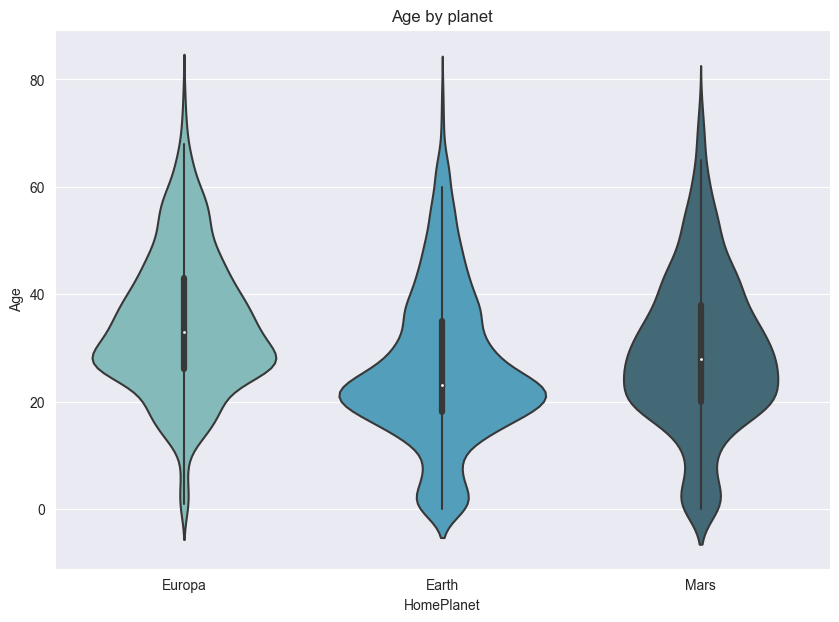

In [22]:
plt.figure(figsize = (10,7))
sns.violinplot(x = 'HomePlanet', y = 'Age', data = X, palette= 'GnBu_d').set_title('Age by planet')
plt.show()

CATEGORİCAL FEATURES

In [23]:
categorical_features_unique = [
 'HomePlanet',
 'CryoSleep',
 'Destination',
 'VIP']
categorical_features_target = [
 'HomePlanet',
 'CryoSleep',
 'Destination',
 'VIP',
 'Transported'
 ]

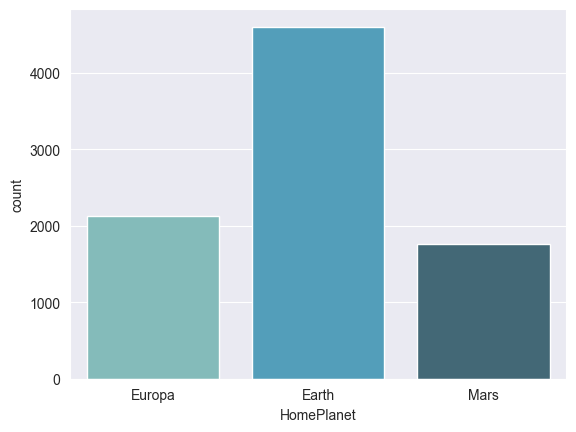

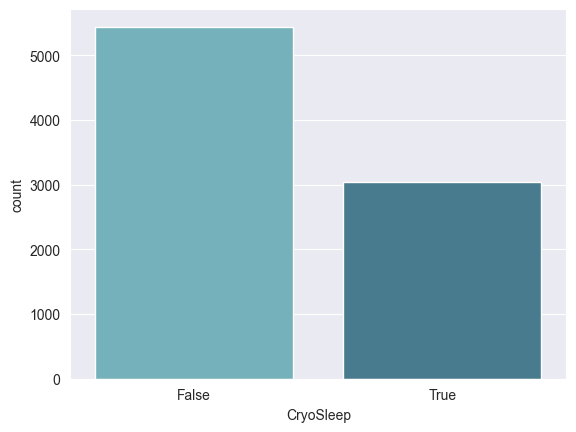

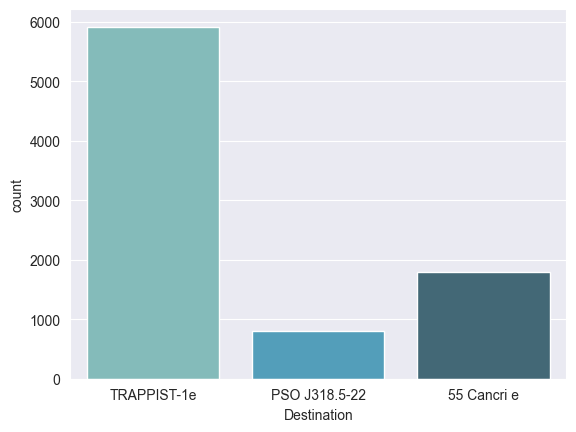

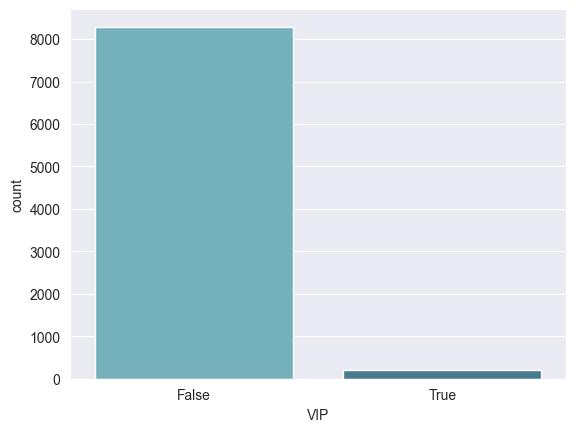

In [24]:
for feature in categorical_features_unique:
    data = X[categorical_features].copy()
    sns.countplot(x = feature, data = data, palette = 'GnBu_d')
    plt.show()

Daha az sayıya sahip olan feature classlarının target üzerindeki etkileri (VIP : False , Destination : PSO J318.5-22)

VIP True X Target

In [25]:
VIP_true_vs_target = df.loc[X["VIP"] == True]

Text(0, 0.5, '# of Passengers')

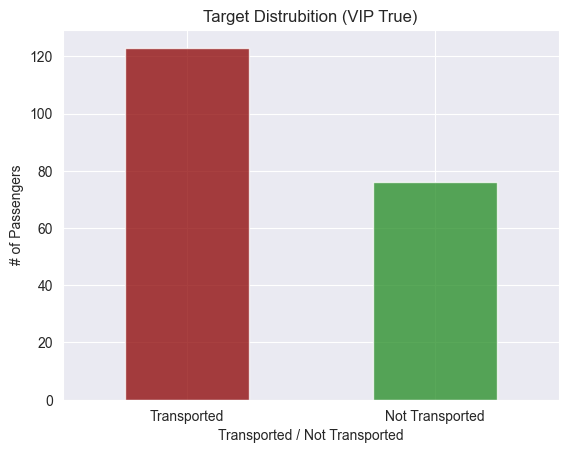

In [26]:
sns.set_style("darkgrid")
ax = VIP_true_vs_target["Transported"].value_counts().plot(kind="bar",alpha = 0.75,color = ['darkred','forestgreen'])
ax.set_xticklabels(['Transported', 'Not Transported'],rotation = 0);
ax.set_title("Target Distrubition (VIP True)")
ax.set_xlabel("Transported / Not Transported")
ax.set_ylabel("# of Passengers")

Destination PSO J318.5-22 X Target

In [27]:
destination_PSO_vs_target = df.loc[X["Destination"] == "PSO J318.5-22"]

Text(0, 0.5, '# of Passengers')

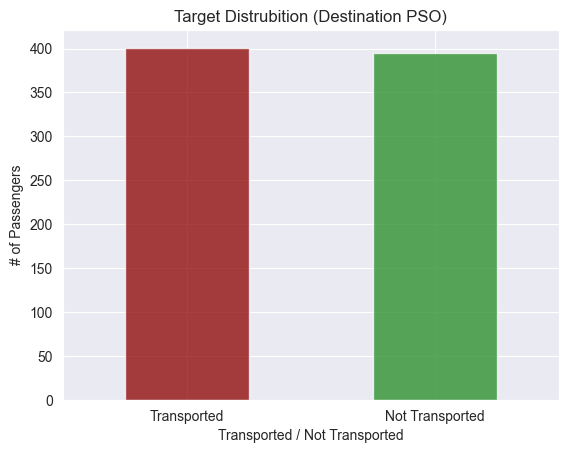

In [28]:
sns.set_style("darkgrid")
ax = destination_PSO_vs_target["Transported"].value_counts().plot(kind="bar",alpha = 0.75,color = ['darkred','forestgreen'])
ax.set_xticklabels(['Transported', 'Not Transported'],rotation = 0);
ax.set_title("Target Distrubition (Destination PSO)")
ax.set_xlabel("Transported / Not Transported")
ax.set_ylabel("# of Passengers")

🔸Destination PSO encodedan sonra düşürülebilir

Categorical X Target

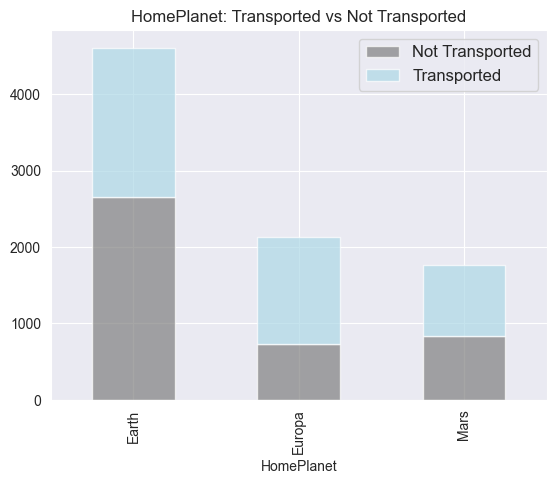

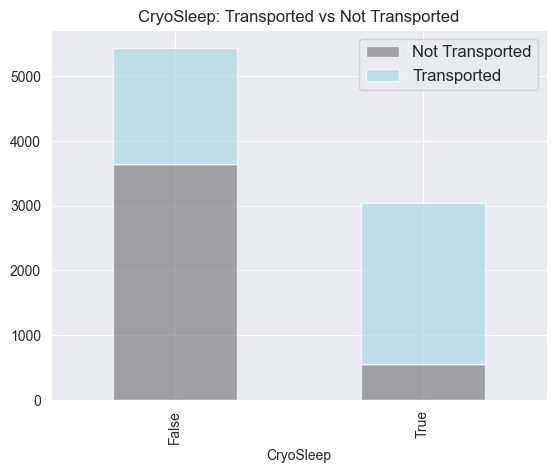

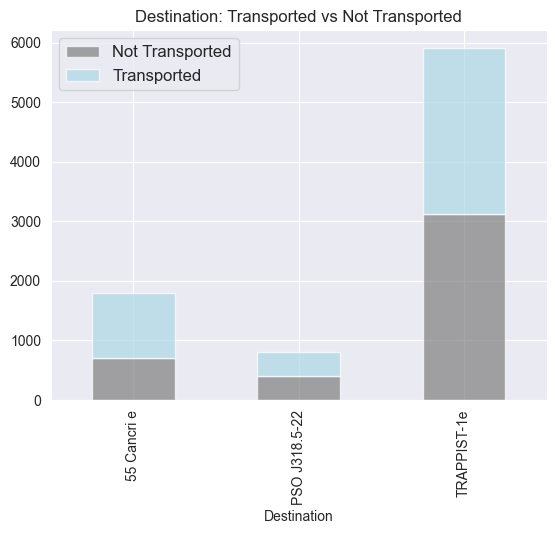

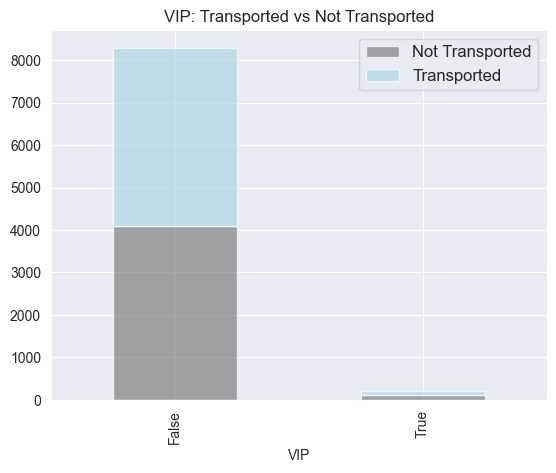

In [29]:
sns.set_style("darkgrid")
for feature in categorical_features_unique:
    new = pd.DataFrame(df[feature]).copy()
    new["Transported"] = df["Transported"].copy()
    new["Transported"] = df["Transported"]
    
    new = new.groupby([feature,'Transported'])[feature].count().unstack()
    p1 = new.plot(kind = 'bar', stacked = True, 
                   title = '{}: Transported vs Not Transported'.format(feature), 
                   color = ['grey','lightblue'], alpha = .70)
    # sns.scatterplot(x = new[feature],y=new["Transported"],hue=new["Transported"])

    plt.legend(["Not Transported","Transported"],prop = {"size":12})   

    plt.show()

🔸Cryo Sleep True olanların bir çoğu Transported
🔸Home Planet Europa olanların bir çoğu Transported
🔸Destination 55 olanların bir çoğu Transported
plotly

CryoSleep True olanların servisler ile arasındaki ilişki

In [30]:
df.loc[df.CryoSleep == True].head()

PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
7      0006_02      Earth      True  G/0/S  TRAPPIST-1e  28.0  False   
9      0008_01     Europa      True  B/1/P  55 Cancri e  14.0  False   
10     0008_02     Europa      True  B/1/P  TRAPPIST-1e  34.0  False   
18     0016_01       Mars      True  F/5/P  TRAPPIST-1e  45.0  False   
21     0020_01      Earth      True  E/0/S  TRAPPIST-1e   1.0  False   

    RoomService  FoodCourt  ShoppingMall  Spa  VRDeck                Name  \
7           0.0        0.0           0.0  0.0     NaN  Candra Jacostaffey   
9           0.0        0.0           0.0  0.0     0.0      Erraiam Flatic   
10          0.0        0.0           NaN  0.0     0.0      Altardr Flatic   
18          0.0        0.0           0.0  0.0     0.0          Alus Upead   
21          0.0        0.0           0.0  0.0     0.0   Almary Brantuarez   

    Transported  
7          True  
9          True  
10         True  
18         True  
21        False

In [31]:
cryo_services = X[["CryoSleep","RoomService","FoodCourt","ShoppingMall","Spa","VRDeck"]]

cryo_true_services = cryo_services.loc[(cryo_services["CryoSleep"] == True) & (cryo_services["CryoSleep"].isna() == False)]


In [32]:
for feature in cryo_true_services:
    if feature == "CryoSleep":
        continue
    print("Not 0 and not null value count for service {} under condition cryo sleep = True:".format(feature),len(cryo_true_services.loc[((X.RoomService != 0) & (X.RoomService.isna() == False))]))


Not 0 and not null value count for service RoomService under condition cryo sleep = True: 0
Not 0 and not null value count for service FoodCourt under condition cryo sleep = True: 0
Not 0 and not null value count for service ShoppingMall under condition cryo sleep = True: 0
Not 0 and not null value count for service Spa under condition cryo sleep = True: 0
Not 0 and not null value count for service VRDeck under condition cryo sleep = True: 0


🔸 TODO: CyroSleep True olanların service değerindeki NaN valuelar 0 ile doldurulacak

In [33]:
services = cryo_services.drop(columns=["CryoSleep"], axis=1)

In [34]:
services.head()

RoomService  FoodCourt  ShoppingMall     Spa  VRDeck
0          0.0        0.0           0.0     0.0     0.0
1        109.0        9.0          25.0   549.0    44.0
2         43.0     3576.0           0.0  6715.0    49.0
3          0.0     1283.0         371.0  3329.0   193.0
4        303.0       70.0         151.0   565.0     2.0

In [35]:
services.describe()

RoomService     FoodCourt  ShoppingMall           Spa        VRDeck
count   8512.000000   8510.000000   8485.000000   8510.000000   8505.000000
mean     224.687617    458.077203    173.729169    311.138778    304.854791
std      666.717663   1611.489240    604.696458   1136.705535   1145.717189
min        0.000000      0.000000      0.000000      0.000000      0.000000
25%        0.000000      0.000000      0.000000      0.000000      0.000000
50%        0.000000      0.000000      0.000000      0.000000      0.000000
75%       47.000000     76.000000     27.000000     59.000000     46.000000
max    14327.000000  29813.000000  23492.000000  22408.000000  24133.000000

İndexlere (Conditionlara) göre bi columnu degistirme buraya bakarsın

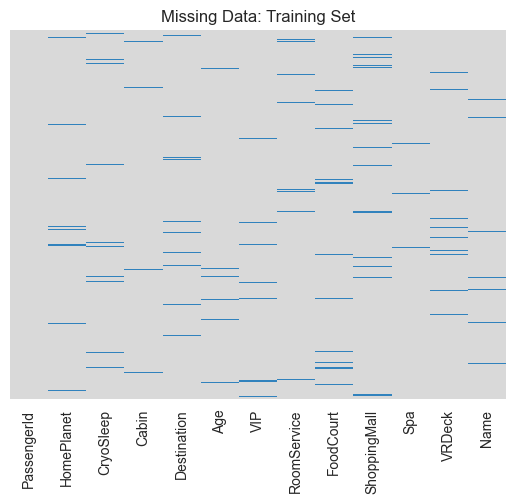

In [36]:
ax = sns.heatmap(X.isnull(),yticklabels = False, cbar = False,cmap = 'tab20c_r')
plt.xticks()
plt.title('Missing Data: Training Set')
plt.show()


🔸 Featureların hepsi aynı yoğunlukta NaN değer içeriyor

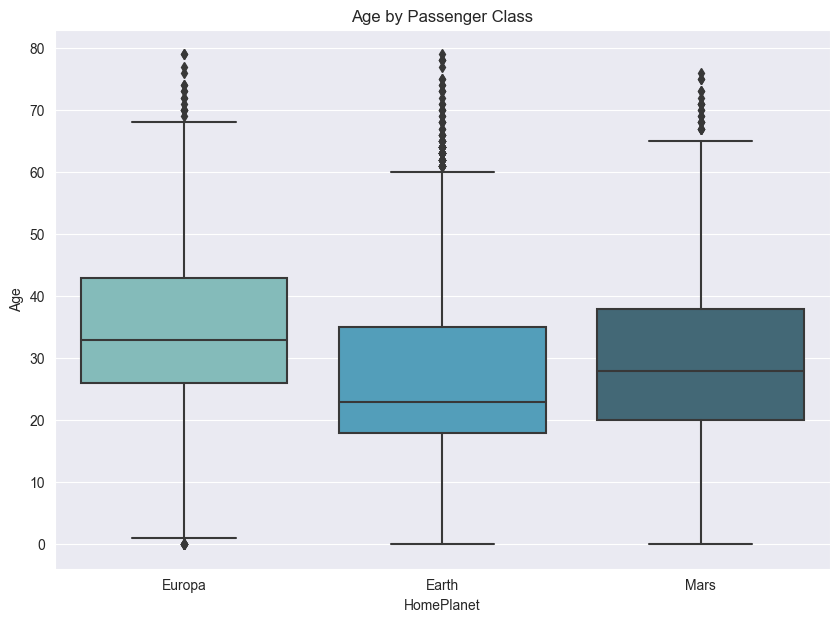

In [37]:
plt.figure(figsize = (10,7))
sns.boxplot(x = 'HomePlanet', y = 'Age', data = X, palette= 'GnBu_d').set_title('Age by Passenger Class')
plt.show()

🔸 Box Plots according to Age for each planet (TODO: Intersection of LOF and Isolation Forest for outliers)

<Axes: >

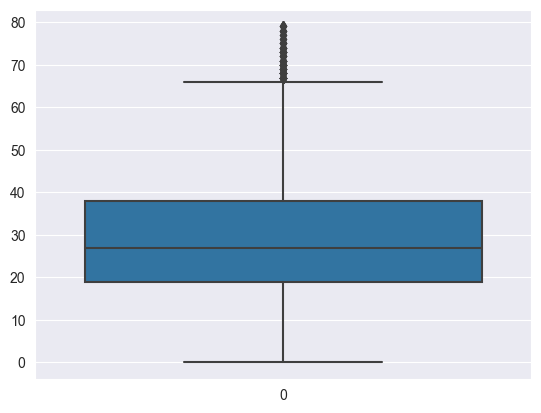

In [38]:
sns.boxplot(X["Age"])

Pandas Profiling

In [39]:
# from ydata_profiling import ProfileReport
# prof = ProfileReport(df)
# prof.to_file(output_file='output.html')

PREPROCESSING

Encoding

In [40]:
indexes = X.index
indexes

RangeIndex(start=0, stop=8693, step=1)

In [41]:
indexes

RangeIndex(start=0, stop=8693, step=1)

In [42]:
X.head()

PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy  
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines  
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent  
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent  
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines

NULL HANDLING

In [43]:
def preprocess(X,columns_to_drop):
    null_handle_mode = ["HomePlanet","CryoSleep","Cabin","Destination","VIP"]

    for feature in null_handle_mode:
        X[feature].fillna(X[feature].mode().iloc[0],inplace=True)

    X["Age"].fillna(X["Age"].median(),inplace=True)
    X["Name"].fillna("Unknown Unknown",inplace=True)
    #services["CryoSleep"] = X["CryoSleep"]

    null_handle = ["HomePlanet","Destination"]

    for feature in null_handle:
        X[feature].fillna(X[feature].mode().iloc[0],inplace=True)

    X = pd.get_dummies(X, columns = ['HomePlanet', 'Destination'],dtype=bool)

    X.drop(columns=["PassengerId","Name"],axis=1,inplace=True)

    X["Cabin"] = X["Cabin"].fillna(X["Cabin"].mode().iloc[0])

    service_features = ["RoomService","FoodCourt","ShoppingMall","Spa","VRDeck","CryoSleep"]

    services_df = X[service_features]
    
    cryo_true_indexes = services_df.loc[services_df["CryoSleep"] == True].index

    for feature in service_features:
        for index in cryo_true_indexes:
            if np.isnan(X.at[index,feature]):
                X.at[index,feature] = 0

    imputer = KNNImputer(n_neighbors=5)
    imputed = imputer.fit_transform(X[service_features])

    services_df = pd.DataFrame(imputed,columns=X[service_features].columns)

    X[service_features] = services_df

    cabin_df = X["Cabin"].copy()

    deck = list()
    deck_no = list()
    side = list()
    for index in cabin_df.index:
        cabin_seperated = cabin_df[index].split("/")
        deck.append(cabin_seperated[0])
        deck_no.append(cabin_seperated[1])
        side.append(cabin_seperated[2])
    
    new_cols = {"deck":deck,"deck_no":deck_no,"side":side}
    new_cols = pd.DataFrame(new_cols)

    X = pd.concat([X,new_cols],axis=1)

    X.drop(columns=["Cabin"],axis=1,inplace=True)

    X = pd.get_dummies(X, columns = ['deck', 'side'],dtype=bool)

    X["deck_no"]= X["deck_no"].astype("uint16")
    X["VIP"] = X["VIP"].astype("bool")
    X["CryoSleep"] = X["CryoSleep"].astype("bool")

    X_np = MinMaxScaler().fit_transform(X)

    X = pd.DataFrame(X_np,columns=X.columns)

    #LAST DROPS

    X.drop(columns=columns_to_drop,axis=1,inplace=True)

    return X

Columns will be handled by mode

In [44]:
null_handle_mode = ["HomePlanet","CryoSleep","Cabin","Destination","VIP"]

In [45]:
X.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
dtype: int64

In [46]:
for feature in null_handle_mode:
    X[feature].fillna(X[feature].mode().iloc[0],inplace=True)

In [47]:
X.isna().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin             0
Destination       0
Age             179
VIP               0
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
dtype: int64

Age null handling

In [48]:
X["Age"].fillna(X["Age"].median(),inplace=True)

In [49]:
X.isna().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin             0
Destination       0
Age               0
VIP               0
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
dtype: int64

Name Null Handling

In [50]:
X["Name"].fillna("Unknown Unknown",inplace=True)

In [51]:
X.isna().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin             0
Destination       0
Age               0
VIP               0
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name              0
dtype: int64

Services Null Handling

In [52]:
services["CryoSleep"] = X["CryoSleep"]

In [53]:
service_features = ["RoomService","FoodCourt","ShoppingMall","Spa","VRDeck"]

Services for CryoSleep True

In [54]:
cryo_true_indexes = services.loc[services["CryoSleep"] == True].index


In [55]:
# indexes = services.loc[services["RoomService"] > 4000].index

# indexes = np.array(indexes)
# for i in indexes:
#     services.at[i,"RoomService"] = 5000

# services.loc[services["RoomService"] == 5000].head()

# services.iloc[75]

In [56]:
X.isna().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin             0
Destination       0
Age               0
VIP               0
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name              0
dtype: int64

In [57]:
for feature in service_features:
    for index in cryo_true_indexes:
        if np.isnan(X.at[index,feature]):
            X.at[index,feature] = 0


In [58]:
X.isna().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin             0
Destination       0
Age               0
VIP               0
RoomService     113
FoodCourt       113
ShoppingMall    112
Spa             118
VRDeck          126
Name              0
dtype: int64

In [59]:
X.loc[X["CryoSleep"] == True].isna().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
dtype: int64

Rest of services

In [60]:
services

RoomService  FoodCourt  ShoppingMall     Spa  VRDeck  CryoSleep
0             0.0        0.0           0.0     0.0     0.0      False
1           109.0        9.0          25.0   549.0    44.0      False
2            43.0     3576.0           0.0  6715.0    49.0      False
3             0.0     1283.0         371.0  3329.0   193.0      False
4           303.0       70.0         151.0   565.0     2.0      False
...           ...        ...           ...     ...     ...        ...
8688          0.0     6819.0           0.0  1643.0    74.0      False
8689          0.0        0.0           0.0     0.0     0.0       True
8690          0.0        0.0        1872.0     1.0     0.0      False
8691          0.0     1049.0           0.0   353.0  3235.0      False
8692        126.0     4688.0           0.0     0.0    12.0      False

[8693 rows x 6 columns]

In [61]:
services.isnull().sum()

RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
CryoSleep         0
dtype: int64

In [62]:
X.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin             0
Destination       0
Age               0
VIP               0
RoomService     113
FoodCourt       113
ShoppingMall    112
Spa             118
VRDeck          126
Name              0
dtype: int64

In [63]:
X["PassengerId"]

0       0001_01
1       0002_01
2       0003_01
3       0003_02
4       0004_01
         ...   
8688    9276_01
8689    9278_01
8690    9279_01
8691    9280_01
8692    9280_02
Name: PassengerId, Length: 8693, dtype: object

In [64]:
null_handle = ["HomePlanet","Destination"]

In [65]:
X.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin             0
Destination       0
Age               0
VIP               0
RoomService     113
FoodCourt       113
ShoppingMall    112
Spa             118
VRDeck          126
Name              0
dtype: int64

In [66]:
for feature in null_handle:
    X[feature].fillna(X[feature].mode().iloc[0],inplace=True)

In [67]:
X[null_handle].isnull().sum()

HomePlanet     0
Destination    0
dtype: int64

In [68]:
X = pd.get_dummies(X, columns = ['HomePlanet', 'Destination'],dtype=bool)

X.head()

PassengerId  CryoSleep  Cabin   Age    VIP  RoomService  FoodCourt  \
0     0001_01      False  B/0/P  39.0  False          0.0        0.0   
1     0002_01      False  F/0/S  24.0  False        109.0        9.0   
2     0003_01      False  A/0/S  58.0   True         43.0     3576.0   
3     0003_02      False  A/0/S  33.0  False          0.0     1283.0   
4     0004_01      False  F/1/S  16.0  False        303.0       70.0   

   ShoppingMall     Spa  VRDeck               Name  HomePlanet_Earth  \
0           0.0     0.0     0.0    Maham Ofracculy             False   
1          25.0   549.0    44.0       Juanna Vines              True   
2           0.0  6715.0    49.0      Altark Susent             False   
3         371.0  3329.0   193.0       Solam Susent             False   
4         151.0   565.0     2.0  Willy Santantines              True   

   HomePlanet_Europa  HomePlanet_Mars  Destination_55 Cancri e  \
0               True            False                    False   
1              False            False                    False   
2               True            False                    False   
3               True            False                    False   
4              False            False                    False   

   Destination_PSO J318.5-22  Destination_TRAPPIST-1e  
0                      False                     True  
1                      False                     True  
2                      False                     True  
3                      False                     True  
4                      False                     True

In [69]:
X.drop(columns=["PassengerId","Name"],axis=1,inplace=True)

Null handling of Cabin feature

In [70]:
X["Cabin"] = X["Cabin"].fillna(X["Cabin"].mode().iloc[0])

In [71]:
X["Cabin"].isna().sum()

0

In [72]:
X["Cabin"].head(30)

0       B/0/P
1       F/0/S
2       A/0/S
3       A/0/S
4       F/1/S
5       F/0/P
6       F/2/S
7       G/0/S
8       F/3/S
9       B/1/P
10      B/1/P
11      B/1/P
12      F/1/P
13      G/1/S
14      F/2/P
15    G/734/S
16      F/3/P
17      F/4/P
18      F/5/P
19      G/0/P
20      F/6/P
21      E/0/S
22      E/0/S
23      E/0/S
24      E/0/S
25      E/0/S
26      E/0/S
27      D/0/P
28      C/2/S
29      F/6/S
Name: Cabin, dtype: object

Cabin Feature Encoding

In [73]:
cabin_df = X["Cabin"].copy()

In [74]:
deck = list()
deck_no = list()
side = list()
for index in cabin_df.index:
    cabin_seperated = cabin_df[index].split("/")
    deck.append(cabin_seperated[0])
    deck_no.append(cabin_seperated[1])
    side.append(cabin_seperated[2])

In [75]:
print(deck,deck_no,side)

['B', 'F', 'A', 'A', 'F', 'F', 'F', 'G', 'F', 'B', 'B', 'B', 'F', 'G', 'F', 'G', 'F', 'F', 'F', 'G', 'F', 'E', 'E', 'E', 'E', 'E', 'E', 'D', 'C', 'F', 'C', 'F', 'G', 'F', 'F', 'F', 'D', 'D', 'F', 'F', 'G', 'G', 'B', 'G', 'G', 'G', 'F', 'F', 'E', 'E', 'G', 'F', 'A', 'A', 'A', 'G', 'F', 'F', 'F', 'E', 'G', 'G', 'G', 'F', 'E', 'F', 'F', 'F', 'F', 'D', 'C', 'F', 'F', 'C', 'G', 'F', 'F', 'F', 'G', 'C', 'F', 'E', 'G', 'G', 'F', 'G', 'G', 'G', 'A', 'G', 'G', 'F', 'G', 'G', 'F', 'F', 'G', 'G', 'F', 'D', 'G', 'G', 'G', 'G', 'B', 'B', 'B', 'E', 'B', 'F', 'G', 'F', 'D', 'A', 'A', 'F', 'G', 'F', 'F', 'E', 'D', 'E', 'G', 'F', 'D', 'G', 'G', 'G', 'E', 'C', 'G', 'F', 'F', 'F', 'G', 'G', 'F', 'G', 'G', 'F', 'G', 'B', 'B', 'G', 'G', 'F', 'F', 'F', 'G', 'E', 'G', 'G', 'E', 'F', 'B', 'D', 'G', 'G', 'G', 'G', 'C', 'F', 'G', 'G', 'E', 'G', 'G', 'G', 'G', 'F', 'F', 'F', 'F', 'D', 'C', 'G', 'G', 'G', 'B', 'B', 'B', 'A', 'C', 'G', 'C', 'G', 'D', 'F', 'F', 'F', 'E', 'F', 'F', 'F', 'F', 'G', 'G', 'G', 'G', 'E',

In [76]:
new_cols = {"deck":deck,"deck_no":deck_no,"side":side}
new_cols = pd.DataFrame(new_cols)
new_cols.head()


deck deck_no side
0    B       0    P
1    F       0    S
2    A       0    S
3    A       0    S
4    F       1    S

In [77]:
X = pd.concat([X,new_cols],axis=1)


In [78]:
X.head()

CryoSleep  Cabin   Age    VIP  RoomService  FoodCourt  ShoppingMall  \
0      False  B/0/P  39.0  False          0.0        0.0           0.0   
1      False  F/0/S  24.0  False        109.0        9.0          25.0   
2      False  A/0/S  58.0   True         43.0     3576.0           0.0   
3      False  A/0/S  33.0  False          0.0     1283.0         371.0   
4      False  F/1/S  16.0  False        303.0       70.0         151.0   

      Spa  VRDeck  HomePlanet_Earth  HomePlanet_Europa  HomePlanet_Mars  \
0     0.0     0.0             False               True            False   
1   549.0    44.0              True              False            False   
2  6715.0    49.0             False               True            False   
3  3329.0   193.0             False               True            False   
4   565.0     2.0              True              False            False   

   Destination_55 Cancri e  Destination_PSO J318.5-22  \
0                    False                      False   
1                    False                      False   
2                    False                      False   
3                    False                      False   
4                    False                      False   

   Destination_TRAPPIST-1e deck deck_no side  
0                     True    B       0    P  
1                     True    F       0    S  
2                     True    A       0    S  
3                     True    A       0    S  
4                     True    F       1    S

In [79]:
X.drop(columns=["Cabin"],axis=1,inplace=True)

In [80]:
X.head()

CryoSleep   Age    VIP  RoomService  FoodCourt  ShoppingMall     Spa  \
0      False  39.0  False          0.0        0.0           0.0     0.0   
1      False  24.0  False        109.0        9.0          25.0   549.0   
2      False  58.0   True         43.0     3576.0           0.0  6715.0   
3      False  33.0  False          0.0     1283.0         371.0  3329.0   
4      False  16.0  False        303.0       70.0         151.0   565.0   

   VRDeck  HomePlanet_Earth  HomePlanet_Europa  HomePlanet_Mars  \
0     0.0             False               True            False   
1    44.0              True              False            False   
2    49.0             False               True            False   
3   193.0             False               True            False   
4     2.0              True              False            False   

   Destination_55 Cancri e  Destination_PSO J318.5-22  \
0                    False                      False   
1                    False                      False   
2                    False                      False   
3                    False                      False   
4                    False                      False   

   Destination_TRAPPIST-1e deck deck_no side  
0                     True    B       0    P  
1                     True    F       0    S  
2                     True    A       0    S  
3                     True    A       0    S  
4                     True    F       1    S

In [81]:
len(X["deck"].unique())

8

In [82]:
X = pd.get_dummies(X, columns = ['deck', 'side'],dtype=bool)

In [83]:
X["deck_no"]= X["deck_no"].astype("uint16")
X["VIP"] = X["VIP"].astype("bool")
X["CryoSleep"] = X["CryoSleep"].astype("bool")

In [84]:
X.head()

CryoSleep   Age    VIP  RoomService  FoodCourt  ShoppingMall     Spa  \
0      False  39.0  False          0.0        0.0           0.0     0.0   
1      False  24.0  False        109.0        9.0          25.0   549.0   
2      False  58.0   True         43.0     3576.0           0.0  6715.0   
3      False  33.0  False          0.0     1283.0         371.0  3329.0   
4      False  16.0  False        303.0       70.0         151.0   565.0   

   VRDeck  HomePlanet_Earth  HomePlanet_Europa  ...  deck_A  deck_B  deck_C  \
0     0.0             False               True  ...   False    True   False   
1    44.0              True              False  ...   False   False   False   
2    49.0             False               True  ...    True   False   False   
3   193.0             False               True  ...    True   False   False   
4     2.0              True              False  ...   False   False   False   

   deck_D  deck_E  deck_F  deck_G  deck_T  side_P  side_S  
0   False   False   False   False   False    True   False  
1   False   False    True   False   False   False    True  
2   False   False   False   False   False   False    True  
3   False   False   False   False   False   False    True  
4   False   False    True   False   False   False    True  

[5 rows x 25 columns]

In [85]:
X.dtypes

CryoSleep                       bool
Age                          float64
VIP                             bool
RoomService                  float64
FoodCourt                    float64
ShoppingMall                 float64
Spa                          float64
VRDeck                       float64
HomePlanet_Earth                bool
HomePlanet_Europa               bool
HomePlanet_Mars                 bool
Destination_55 Cancri e         bool
Destination_PSO J318.5-22       bool
Destination_TRAPPIST-1e         bool
deck_no                       uint16
deck_A                          bool
deck_B                          bool
deck_C                          bool
deck_D                          bool
deck_E                          bool
deck_F                          bool
deck_G                          bool
deck_T                          bool
side_P                          bool
side_S                          bool
dtype: object

In [86]:
X.isna().sum()

CryoSleep                      0
Age                            0
VIP                            0
RoomService                  113
FoodCourt                    113
ShoppingMall                 112
Spa                          118
VRDeck                       126
HomePlanet_Earth               0
HomePlanet_Europa              0
HomePlanet_Mars                0
Destination_55 Cancri e        0
Destination_PSO J318.5-22      0
Destination_TRAPPIST-1e        0
deck_no                        0
deck_A                         0
deck_B                         0
deck_C                         0
deck_D                         0
deck_E                         0
deck_F                         0
deck_G                         0
deck_T                         0
side_P                         0
side_S                         0
dtype: int64

In [87]:
X["Transported"] = y

In [88]:
X.drop(columns=["Transported"],axis=1,inplace=True)

In [89]:
correlation_matrix = X.corr()

plt.figure(figsize=(30,30), dpi =500)
sns.heatmap(correlation_matrix,annot=True,fmt=".2f", linewidth=.5)
plt.show()

NULL HANDLING

In [90]:
X.isna().sum()

CryoSleep                      0
Age                            0
VIP                            0
RoomService                  113
FoodCourt                    113
ShoppingMall                 112
Spa                          118
VRDeck                       126
HomePlanet_Earth               0
HomePlanet_Europa              0
HomePlanet_Mars                0
Destination_55 Cancri e        0
Destination_PSO J318.5-22      0
Destination_TRAPPIST-1e        0
deck_no                        0
deck_A                         0
deck_B                         0
deck_C                         0
deck_D                         0
deck_E                         0
deck_F                         0
deck_G                         0
deck_T                         0
side_P                         0
side_S                         0
dtype: int64

In [91]:
# for feature in service_features:
#     X[feature].fillna(X[feature].mode().iloc[0],inplace=True)

# imputer = KNNImputer(n_neighbors=39)
# imputed = imputer.fit_transform(X[service_features])
# services = pd.DataFrame(imputed,columns=X[service_features].columns)
# X[service_features] = services

In [92]:
X[service_features].isna().sum()

RoomService     113
FoodCourt       113
ShoppingMall    112
Spa             118
VRDeck          126
dtype: int64

In [93]:
# acc_list = list()
# n_list = list()
# for i in range(1,40):
#     copy_data = X[service_features].copy()
#     imputer = KNNImputer(n_neighbors=i)
#     imputed = imputer.fit_transform(copy_data)
#     copy_data = pd.DataFrame(imputed,columns=copy_data.columns)

#     X_copy = X.copy()
#     X_copy[service_features] = copy_data
#     clf_impute = RandomForestClassifier()

    
#     X_train, X_test, y_train, y_test = train_test_split(X_copy, y, test_size=0.1, random_state=42)

#     clf_impute.fit(X_train,y_train)

#     preds = clf_impute.predict(X_test)

#     acc = accuracy_score(preds,y_test)

#     acc_list.append(acc)
#     n_list.append(i)

#     print("n_neighbours: ",i,"Accuarcy: {}".format(acc))

In [94]:
# sns.set_color_codes("pastel")
# sns.set(rc={'figure.figsize':(10,10)})
# sns.lineplot(x=n_list,y=acc_list)
# max_n = acc_list.index(max(acc_list))
# plt.title("KNNImputer tuning results: max accuracy value = {} with n_neighbours = {}".format(max(acc_list),n_list[max_n]))
# plt.xlabel("Number of neighbours")
# plt.ylabel("Accuracy")
# plt.show()


In [95]:
imputer = KNNImputer(n_neighbors=5)
imputed = imputer.fit_transform(X[service_features])
imputed = pd.DataFrame(imputed,columns=X[service_features].columns)
X[service_features] = imputed

In [96]:
X.isna().sum()

CryoSleep                    0
Age                          0
VIP                          0
RoomService                  0
FoodCourt                    0
ShoppingMall                 0
Spa                          0
VRDeck                       0
HomePlanet_Earth             0
HomePlanet_Europa            0
HomePlanet_Mars              0
Destination_55 Cancri e      0
Destination_PSO J318.5-22    0
Destination_TRAPPIST-1e      0
deck_no                      0
deck_A                       0
deck_B                       0
deck_C                       0
deck_D                       0
deck_E                       0
deck_F                       0
deck_G                       0
deck_T                       0
side_P                       0
side_S                       0
dtype: int64

OUTLIER HANDLING

In [97]:
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

In [98]:
iso_forest = IsolationForest(random_state=0)
iso_forest.fit(X)

IsolationForest(random_state=0)

In [99]:
lof = LocalOutlierFactor()


lof ve iso sabitlemek lazım

In [100]:
outliers_iso = iso_forest.predict(X)
outliers_iso

array([ 1,  1, -1, ...,  1, -1, -1])

In [101]:
outliers_lof = lof.fit_predict(X)
outliers_lof

array([1, 1, 1, ..., 1, 1, 1])

In [102]:
print("Outliers detected by Isolation Forest:",len([outliers for outliers in outliers_iso if outliers == -1]))
print("Outliers detected by LOF:",len([outliers for outliers in outliers_lof if outliers == -1]))

Outliers detected by Isolation Forest: 1451
Outliers detected by LOF: 507


In [103]:
outliers_intersection = list()
outliers_intersection_idx = list()
for i in range(len(outliers_lof)):
    if outliers_lof[i] == -1 and outliers_iso[i] == -1:
        outliers_intersection.append(outliers_iso[i])
        outliers_intersection_idx.append(i)
print("Outliers detected by intersection of LOF and Isolation forest",len(outliers_intersection))
print("Indexes of outliers detected by intersection of LOF and Isolation forest",outliers_intersection_idx)

Outliers detected by intersection of LOF and Isolation forest 198
Indexes of outliers detected by intersection of LOF and Isolation forest [35, 73, 154, 301, 309, 316, 326, 338, 358, 366, 375, 416, 490, 496, 508, 707, 718, 725, 735, 799, 853, 930, 1043, 1057, 1062, 1078, 1095, 1098, 1133, 1136, 1189, 1213, 1379, 1447, 1467, 1572, 1595, 1598, 1605, 1667, 1703, 1708, 1729, 1783, 1947, 1966, 1980, 2050, 2054, 2067, 2207, 2361, 2406, 2422, 2492, 2493, 2552, 2584, 2646, 2647, 2653, 2678, 2757, 2770, 2815, 2827, 2894, 2903, 2956, 3051, 3104, 3198, 3317, 3366, 3458, 3468, 3480, 3538, 3540, 3677, 3763, 3777, 3821, 3916, 3984, 4004, 4024, 4059, 4080, 4098, 4278, 4311, 4313, 4416, 4434, 4699, 4714, 4724, 4747, 4762, 4774, 4882, 5057, 5105, 5118, 5182, 5215, 5218, 5252, 5309, 5392, 5406, 5409, 5412, 5518, 5574, 5599, 5602, 5619, 5673, 5714, 5722, 5724, 5777, 5808, 5842, 5864, 5945, 5990, 6025, 6047, 6157, 6172, 6200, 6223, 6377, 6443, 6451, 6453, 6492, 6509, 6533, 6543, 6547, 6554, 6595, 6598, 66

In [104]:
X.shape

(8693, 25)

In [105]:
X.drop(outliers_intersection_idx,axis="index",inplace=True)
y.drop(outliers_intersection_idx,axis="index",inplace=True)

In [106]:
X.shape

(8495, 25)

In [107]:
X = X.reset_index()
y = y.reset_index()

In [108]:
X.drop(columns=["index"],axis=1,inplace=True)


In [109]:
y.drop(columns=["index"],axis=1,inplace=True)

In [110]:
X.head()

CryoSleep   Age    VIP  RoomService  FoodCourt  ShoppingMall     Spa  \
0      False  39.0  False          0.0        0.0           0.0     0.0   
1      False  24.0  False        109.0        9.0          25.0   549.0   
2      False  58.0   True         43.0     3576.0           0.0  6715.0   
3      False  33.0  False          0.0     1283.0         371.0  3329.0   
4      False  16.0  False        303.0       70.0         151.0   565.0   

   VRDeck  HomePlanet_Earth  HomePlanet_Europa  ...  deck_A  deck_B  deck_C  \
0     0.0             False               True  ...   False    True   False   
1    44.0              True              False  ...   False   False   False   
2    49.0             False               True  ...    True   False   False   
3   193.0             False               True  ...    True   False   False   
4     2.0              True              False  ...   False   False   False   

   deck_D  deck_E  deck_F  deck_G  deck_T  side_P  side_S  
0   False   False   False   False   False    True   False  
1   False   False    True   False   False   False    True  
2   False   False   False   False   False   False    True  
3   False   False   False   False   False   False    True  
4   False   False    True   False   False   False    True  

[5 rows x 25 columns]

SCALING

In [111]:
X_np = MinMaxScaler().fit_transform(X)

In [112]:
X = pd.DataFrame(X_np,columns=X.columns)

PCA

In [113]:
covariance_matrix = np.cov(X,bias = True)

In [114]:
covariance_matrix.shape

(8495, 8495)

In [115]:
#eig_values, eig_vectors = np.linalg.eig(covariance_matrix)

In [116]:
# idx = np.argsort(eig_values, axis=0)[::-1]
# sorted_eig_vectors = eig_vectors[:, idx]

In [117]:
# cumsum = np.cumsum(eig_values[idx]) / np.sum(eig_values[idx])
# xint = range(1, len(cumsum) + 1)
# plt.bar(xint, cumsum)

# plt.xlabel("Number of components")
# plt.ylabel("Cumulative explained variance")
# plt.xticks(xint)
# plt.xlim(1, 25, 1)

MODEL TRAINING

In [118]:
X.head()

CryoSleep       Age  VIP  RoomService  FoodCourt  ShoppingMall       Spa  \
0        0.0  0.493671  0.0     0.000000   0.000000      0.000000  0.000000   
1        0.0  0.303797  0.0     0.012695   0.000427      0.003479  0.033084   
2        0.0  0.734177  1.0     0.005008   0.169752      0.000000  0.404664   
3        0.0  0.417722  0.0     0.000000   0.060904      0.051635  0.200615   
4        0.0  0.202532  0.0     0.035290   0.003323      0.021016  0.034048   

     VRDeck  HomePlanet_Earth  HomePlanet_Europa  ...  deck_A  deck_B  deck_C  \
0  0.000000               0.0                1.0  ...     0.0     1.0     0.0   
1  0.003462               1.0                0.0  ...     0.0     0.0     0.0   
2  0.003856               0.0                1.0  ...     1.0     0.0     0.0   
3  0.015187               0.0                1.0  ...     1.0     0.0     0.0   
4  0.000157               1.0                0.0  ...     0.0     0.0     0.0   

   deck_D  deck_E  deck_F  deck_G  deck_T  side_P  side_S  
0     0.0     0.0     0.0     0.0     0.0     1.0     0.0  
1     0.0     0.0     1.0     0.0     0.0     0.0     1.0  
2     0.0     0.0     0.0     0.0     0.0     0.0     1.0  
3     0.0     0.0     0.0     0.0     0.0     0.0     1.0  
4     0.0     0.0     1.0     0.0     0.0     0.0     1.0  

[5 rows x 25 columns]

Feature Drops

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# clf = RandomForestClassifier()

# param_grid = {
# 'n_estimators': [50, 100, 200],
# 'min_samples_leaf': [1, 5, 7],
# 'max_depth': [4, 6, 8],
# 'max_features': ['auto', 'sqrt'],
# 'bootstrap': [True, False]}

# grid = GridSearchCV(clf,param_grid,cv = 3)
# grid.fit(X_train,y_train)

Catboost adaBoost XGBoost LightGBM

In [120]:
#grid.best_params_

RANDOM FOREST TRAINING

In [121]:
clf = RandomForestClassifier(bootstrap=False,max_depth=8,max_features='sqrt',min_samples_leaf=1,n_estimators=100)

clf.fit(X_train,y_train)
preds_train = clf.predict(X_train)
acc_train = accuracy_score(preds_train,y_train)


preds = clf.predict(X_test)

acc = accuracy_score(preds,y_test)


In [122]:
print("Accuarcy: {}".format(acc))
print("Training accuracy: {}".format(acc_train))

Accuarcy: 0.7981165391406709
Training accuracy: 0.8409358446144791


FEATURE IMPORTANCE

In [123]:
feature_names = list()
for i in X:
    feature_names.append(i)

XGBOOST TRAINING

In [124]:
# grid = {"learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
#  "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
#  "min_child_weight" : [ 1, 3, 5, 7 ],
#  "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
#  "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ] }

# xg = XGBClassifier()
# grid = GridSearchCV(xg,grid,cv = 3)
# grid.fit(X_train,y_train)

In [125]:
# grid.best_params_

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


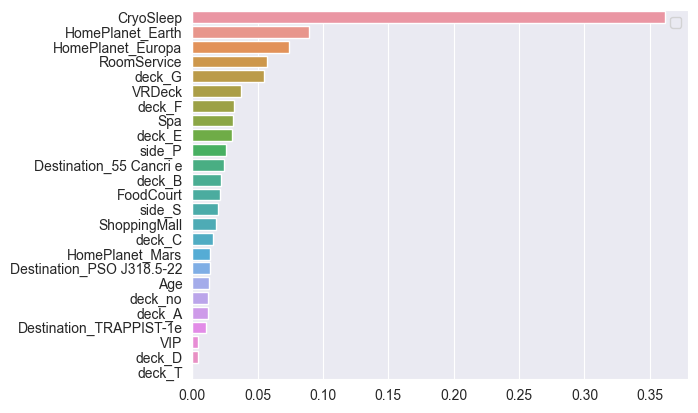

In [126]:

model = XGBClassifier(colsample_bytree = 0.7 , gamma = 0.3, learning_rate = 0.25, max_depth = 4, min_child_weight = 5)
model.fit(X_train, y_train)
importance_xg = pd.Series(model.feature_importances_,index=feature_names).sort_values(ascending=False)

sns.barplot(x=importance_xg, y=importance_xg.index)

plt.legend()
plt.show()


In [127]:
X.head()

CryoSleep       Age  VIP  RoomService  FoodCourt  ShoppingMall       Spa  \
0        0.0  0.493671  0.0     0.000000   0.000000      0.000000  0.000000   
1        0.0  0.303797  0.0     0.012695   0.000427      0.003479  0.033084   
2        0.0  0.734177  1.0     0.005008   0.169752      0.000000  0.404664   
3        0.0  0.417722  0.0     0.000000   0.060904      0.051635  0.200615   
4        0.0  0.202532  0.0     0.035290   0.003323      0.021016  0.034048   

     VRDeck  HomePlanet_Earth  HomePlanet_Europa  ...  deck_A  deck_B  deck_C  \
0  0.000000               0.0                1.0  ...     0.0     1.0     0.0   
1  0.003462               1.0                0.0  ...     0.0     0.0     0.0   
2  0.003856               0.0                1.0  ...     1.0     0.0     0.0   
3  0.015187               0.0                1.0  ...     1.0     0.0     0.0   
4  0.000157               1.0                0.0  ...     0.0     0.0     0.0   

   deck_D  deck_E  deck_F  deck_G  deck_T  side_P  side_S  
0     0.0     0.0     0.0     0.0     0.0     1.0     0.0  
1     0.0     0.0     1.0     0.0     0.0     0.0     1.0  
2     0.0     0.0     0.0     0.0     0.0     0.0     1.0  
3     0.0     0.0     0.0     0.0     0.0     0.0     1.0  
4     0.0     0.0     1.0     0.0     0.0     0.0     1.0  

[5 rows x 25 columns]

In [128]:
preds = model.predict(X_test)
preds_train = model.predict(X_train)

acc = accuracy_score(preds,y_test)
acc_train = accuracy_score(preds_train,y_train)

print("Accuarcy: {}".format(acc))
print("Training accuracy: {}".format(acc_train))

#0.8152941176470588

Accuarcy: 0.8063566804002354
Training accuracy: 0.8597704532077692


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


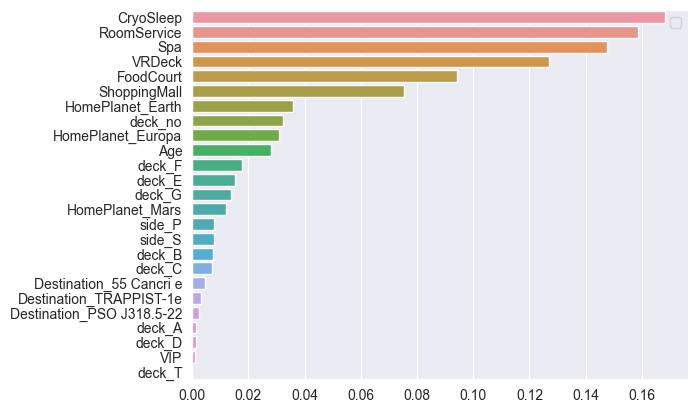

In [129]:

importance_clf = pd.Series(clf.feature_importances_,index=feature_names).sort_values(ascending=False)

sns.barplot(x=importance_clf, y=importance_clf.index)

plt.legend()
plt.show()


Shap Value Analysis

In [130]:
import shap

In [131]:
# Fits the explainer
explainer = shap.Explainer(model.predict, X_test)
# Calculates the SHAP values - It takes some time
shap_values = explainer(X_test)

Permutation explainer: 1700it [01:32, 16.92it/s]                          


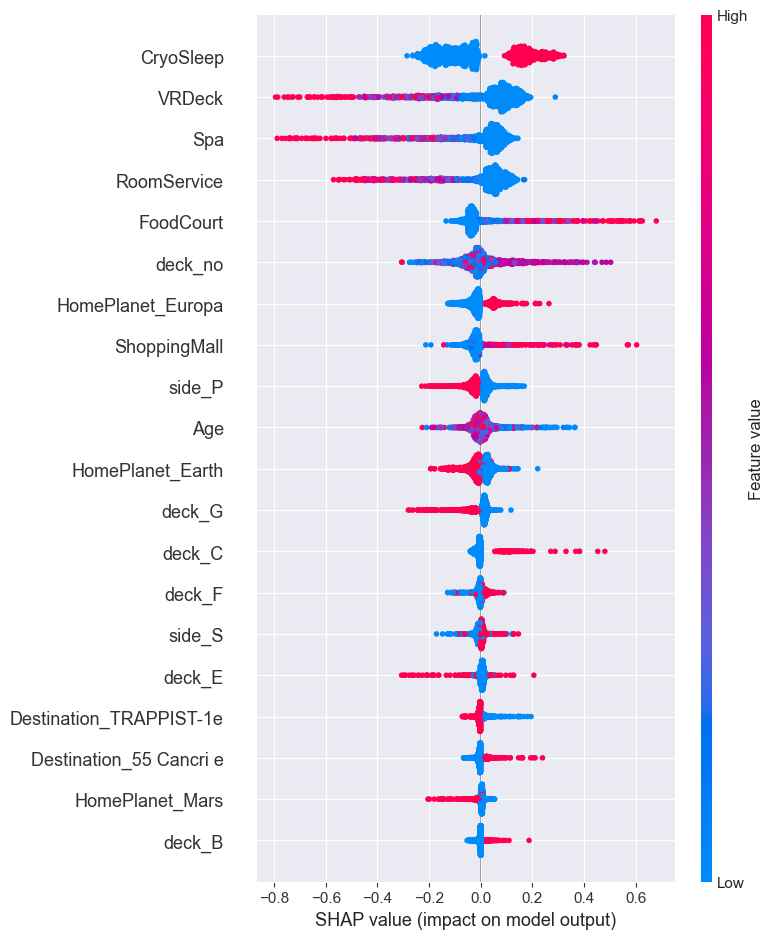

In [132]:
shap.summary_plot(shap_values)

Shap Value Local 

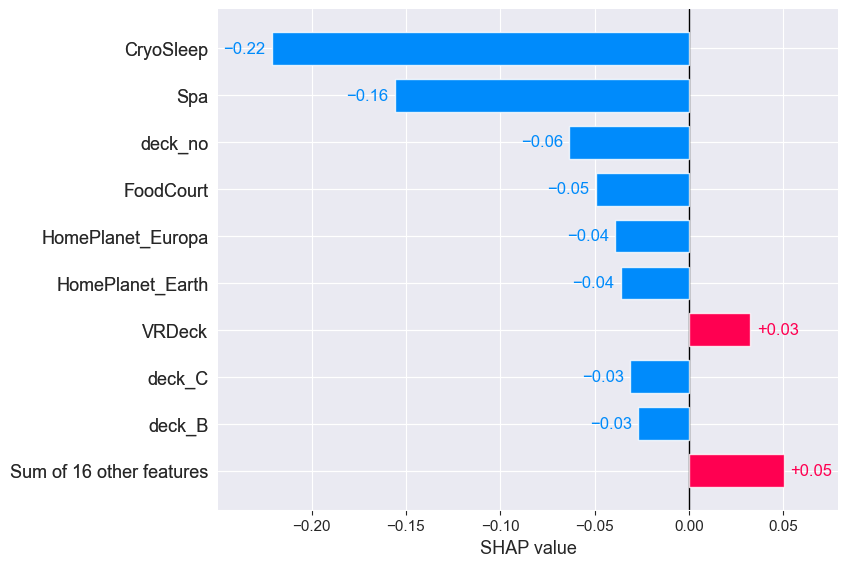

In [133]:
shap.plots.bar(shap_values[2])

Boruta Feature Selection

In [134]:
from boruta import BorutaPy

clf = XGBClassifier(colsample_bytree = 0.7 , gamma = 0.3, learning_rate = 0.25, max_depth = 4, min_child_weight = 5)

trans = BorutaPy(clf, random_state=42, verbose=2)
sel = trans.fit_transform(X_train.values, y_train.values)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	25
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	25
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	25
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	25
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	25
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	25
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	25
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	12
Tentative: 	10
Rejected: 	3
Iteration: 	9 / 100
Confirmed: 	12
Tentative: 	10
Rejected: 	3
Iteration: 	10 / 100
Confirmed: 	12
Tentative: 	10
Rejected: 	3
Iteration: 	11 / 100
Confirmed: 	12
Tentative: 	10
Rejected: 	3
Iteration: 	12 / 100
Confirmed: 	16
Tentative: 	6
Rejected: 	3
Iteration: 	13 / 100
Confirmed: 	16
Tentative: 	6
Rejected: 	3
Iteration: 	14 / 100
Confirmed: 	16
Tentative: 	6
Rejected: 	3
Iteration: 	15 / 100
Confirmed: 	16
Tentative: 	6
Rejected: 	3
Iteration: 	16 / 100
Confirmed: 	16
Tentative: 	6
Rejected: 

In [135]:
trans.support_

array([ True, False, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False, False, False,  True,  True,
       False,  True,  True,  True, False,  True,  True])

In [136]:
drop_columns = list()
for i in range(len(trans.support_)):
    if trans.support_[i]:
        print("Passes the test: ", X.columns[i],
              " - Ranking: ", trans.ranking_[i])
    else:
        print("Doesn't pass the test: ",
              X.columns[i], " - Ranking: ", trans.ranking_[i])
        drop_columns.append(X.columns[i])

Passes the test:  CryoSleep  - Ranking:  1
Doesn't pass the test:  Age  - Ranking:  5
Doesn't pass the test:  VIP  - Ranking:  6
Passes the test:  RoomService  - Ranking:  1
Passes the test:  FoodCourt  - Ranking:  1
Passes the test:  ShoppingMall  - Ranking:  1
Passes the test:  Spa  - Ranking:  1
Passes the test:  VRDeck  - Ranking:  1
Passes the test:  HomePlanet_Earth  - Ranking:  1
Passes the test:  HomePlanet_Europa  - Ranking:  1
Passes the test:  HomePlanet_Mars  - Ranking:  1
Passes the test:  Destination_55 Cancri e  - Ranking:  1
Doesn't pass the test:  Destination_PSO J318.5-22  - Ranking:  3
Doesn't pass the test:  Destination_TRAPPIST-1e  - Ranking:  3
Doesn't pass the test:  deck_no  - Ranking:  3
Doesn't pass the test:  deck_A  - Ranking:  2
Passes the test:  deck_B  - Ranking:  1
Passes the test:  deck_C  - Ranking:  1
Doesn't pass the test:  deck_D  - Ranking:  6
Passes the test:  deck_E  - Ranking:  1
Passes the test:  deck_F  - Ranking:  1
Passes the test:  deck_G  

In [139]:
drop_columns

['Age',
 'VIP',
 'Destination_PSO J318.5-22',
 'Destination_TRAPPIST-1e',
 'deck_no',
 'deck_A',
 'deck_D',
 'deck_T']

In [140]:

drop_columns.remove("Destination_TRAPPIST-1e")
drop_columns.remove("Destination_PSO J318.5-22")


In [141]:
drop_columns

['Age', 'VIP', 'deck_no', 'deck_A', 'deck_D', 'deck_T']

In [140]:
X.head(1)

CryoSleep       Age  VIP  RoomService  FoodCourt  ShoppingMall  Spa  \
0        0.0  0.493671  0.0          0.0        0.0           0.0  0.0   

   VRDeck  HomePlanet_Earth  HomePlanet_Europa  ...  deck_A  deck_B  deck_C  \
0     0.0               0.0                1.0  ...     0.0     1.0     0.0   

   deck_D  deck_E  deck_F  deck_G  deck_T  side_P  side_S  
0     0.0     0.0     0.0     0.0     0.0     1.0     0.0  

[1 rows x 25 columns]

In [142]:
droped_X = X.drop(columns=drop_columns,axis=1)

In [302]:
droped_X.head()

CryoSleep  RoomService  FoodCourt  ShoppingMall       Spa    VRDeck  \
0        0.0     0.000000   0.000000      0.000000  0.000000  0.000000   
1        0.0     0.012695   0.000427      0.003479  0.033084  0.003462   
2        0.0     0.005008   0.169752      0.000000  0.404664  0.003856   
3        0.0     0.000000   0.060904      0.051635  0.200615  0.015187   
4        0.0     0.035290   0.003323      0.021016  0.034048  0.000157   

   HomePlanet_Earth  HomePlanet_Europa  HomePlanet_Mars  \
0               0.0                1.0              0.0   
1               1.0                0.0              0.0   
2               0.0                1.0              0.0   
3               0.0                1.0              0.0   
4               1.0                0.0              0.0   

   Destination_55 Cancri e  Destination_PSO J318.5-22  \
0                      0.0                        0.0   
1                      0.0                        0.0   
2                      0.0                        0.0   
3                      0.0                        0.0   
4                      0.0                        0.0   

   Destination_TRAPPIST-1e  deck_A  deck_B  deck_C  deck_E  deck_F  deck_G  \
0                      1.0     0.0     1.0     0.0     0.0     0.0     0.0   
1                      1.0     0.0     0.0     0.0     0.0     1.0     0.0   
2                      1.0     1.0     0.0     0.0     0.0     0.0     0.0   
3                      1.0     1.0     0.0     0.0     0.0     0.0     0.0   
4                      1.0     0.0     0.0     0.0     0.0     1.0     0.0   

   side_P  side_S  
0     1.0     0.0  
1     0.0     1.0  
2     0.0     1.0  
3     0.0     1.0  
4     0.0     1.0

In [143]:
X_train_drop, X_test_drop, y_train_drop, y_test_drop = train_test_split(droped_X, y, test_size=0.2, random_state=42)

In [145]:
grid = {"learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ] }

xg = XGBClassifier()
grid = GridSearchCV(xg,grid,cv = 3)
grid.fit(X_train_drop,y_train_drop)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'colsample_bytree': [0.3, 0.4, 0.5, 0.7],
                         'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                         'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
                         'max_depth': [3, 4, 5, 6, 8, 10, 12, 15],
                         'min_child_weight': [1, 3, 5, 7]})

In [148]:
grid.best_params_

{'colsample_bytree': 0.4,
 'gamma': 0.2,
 'learning_rate': 0.2,
 'max_depth': 5,
 'min_child_weight': 5}

In [149]:
droped_XGB = XGBClassifier(colsample_bytree =0.4, gamma = 0.2, learning_rate = 0.22, max_depth = 5, min_child_weight = 5)
droped_XGB.fit(droped_X, y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.4, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.2, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.22, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [142]:
# preds = droped_XGB.predict(X_test)
# preds_train = droped_XGB.predict(X_train)

# acc = accuracy_score(preds,y_test)
# acc_train = accuracy_score(preds_train,y_train)

# print("Accuarcy: {}".format(acc))
# print("Training accuracy: {}".format(acc_train))


Accuarcy: 0.8063566804002354
Training accuracy: 0.8597704532077692


In [150]:
droped_X.head()

CryoSleep  RoomService  FoodCourt  ShoppingMall       Spa    VRDeck  \
0        0.0     0.000000   0.000000      0.000000  0.000000  0.000000   
1        0.0     0.012695   0.000427      0.003479  0.033084  0.003462   
2        0.0     0.005008   0.169752      0.000000  0.404664  0.003856   
3        0.0     0.000000   0.060904      0.051635  0.200615  0.015187   
4        0.0     0.035290   0.003323      0.021016  0.034048  0.000157   

   HomePlanet_Earth  HomePlanet_Europa  HomePlanet_Mars  \
0               0.0                1.0              0.0   
1               1.0                0.0              0.0   
2               0.0                1.0              0.0   
3               0.0                1.0              0.0   
4               1.0                0.0              0.0   

   Destination_55 Cancri e  Destination_PSO J318.5-22  \
0                      0.0                        0.0   
1                      0.0                        0.0   
2                      0.0                        0.0   
3                      0.0                        0.0   
4                      0.0                        0.0   

   Destination_TRAPPIST-1e  deck_B  deck_C  deck_E  deck_F  deck_G  side_P  \
0                      1.0     1.0     0.0     0.0     0.0     0.0     1.0   
1                      1.0     0.0     0.0     0.0     1.0     0.0     0.0   
2                      1.0     0.0     0.0     0.0     0.0     0.0     0.0   
3                      1.0     0.0     0.0     0.0     0.0     0.0     0.0   
4                      1.0     0.0     0.0     0.0     1.0     0.0     0.0   

   side_S  
0     0.0  
1     1.0  
2     1.0  
3     1.0  
4     1.0

SUBMIT CODE

In [151]:
test_submit = pd.read_csv("test.csv")
test_submit.shape

(4277, 13)

In [152]:
test_submit.isna().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [153]:
id_submit = test_submit["PassengerId"]

In [154]:
test_submit = preprocess(test_submit,drop_columns)

In [155]:
test_submit.shape

(4277, 19)

In [156]:
test_submit

CryoSleep  RoomService  FoodCourt  ShoppingMall       Spa    VRDeck  \
0           1.0     0.000000   0.000000       0.00000  0.000000  0.000000   
1           0.0     0.000000   0.000356       0.00000  0.142260  0.000000   
2           1.0     0.000000   0.000000       0.00000  0.000000  0.000000   
3           0.0     0.000000   0.263206       0.00000  0.009121  0.026266   
4           0.0     0.000865   0.000000       0.07658  0.000000  0.000000   
...         ...          ...        ...           ...       ...       ...   
4272        1.0     0.000000   0.000000       0.00000  0.000000  0.000000   
4273        0.0     0.000000   0.033514       0.00205  0.000504  0.006466   
4274        1.0     0.000000   0.000000       0.00000  0.000000  0.000000   
4275        0.0     0.000000   0.106042       0.00000  0.000000  0.023482   
4276        1.0     0.000000   0.000000       0.00000  0.000000  0.000000   

      HomePlanet_Earth  HomePlanet_Europa  HomePlanet_Mars  \
0                  1.0                0.0              0.0   
1                  1.0                0.0              0.0   
2                  0.0                1.0              0.0   
3                  0.0                1.0              0.0   
4                  1.0                0.0              0.0   
...                ...                ...              ...   
4272               1.0                0.0              0.0   
4273               1.0                0.0              0.0   
4274               0.0                0.0              1.0   
4275               0.0                1.0              0.0   
4276               1.0                0.0              0.0   

      Destination_55 Cancri e  Destination_PSO J318.5-22  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         1.0                        0.0   
3                         0.0                        0.0   
4                         0.0                        0.0   
...                       ...                        ...   
4272                      0.0                        0.0   
4273                      0.0                        0.0   
4274                      1.0                        0.0   
4275                      0.0                        0.0   
4276                      0.0                        1.0   

      Destination_TRAPPIST-1e  deck_B  deck_C  deck_E  deck_F  deck_G  side_P  \
0                         1.0     0.0     0.0     0.0     0.0     1.0     0.0   
1                         1.0     0.0     0.0     0.0     1.0     0.0     0.0   
2                         0.0     0.0     1.0     0.0     0.0     0.0     0.0   
3                         1.0     0.0     1.0     0.0     0.0     0.0     0.0   
4                         1.0     0.0     0.0     0.0     1.0     0.0     0.0   
...                       ...     ...     ...     ...     ...     ...     ...   
4272                      1.0     0.0     0.0     0.0     0.0     1.0     0.0   
4273                      1.0     0.0     0.0     0.0     0.0     1.0     1.0   
4274                      0.0     0.0     0.0     0.0     0.0     0.0     1.0   
4275                      1.0     0.0     0.0     0.0     0.0     0.0     1.0   
4276                      0.0     0.0     0.0     0.0     0.0     1.0     0.0   

      side_S  
0        1.0  
1        1.0  
2        1.0  
3        1.0  
4        1.0  
...      ...  
4272     1.0  
4273     0.0  
4274     0.0  
4275     0.0  
4276     1.0  

[4277 rows x 19 columns]

In [157]:
#test_submit.fillna(method="bfill",inplace=True)

In [158]:

submit_preds = droped_XGB.predict(test_submit)

In [159]:
len(submit_preds)

4277

In [160]:
submission = pd.concat([id_submit,pd.DataFrame({"Transported":submit_preds})],axis=1)

In [161]:
submission.head()

PassengerId  Transported
0     0013_01            1
1     0018_01            0
2     0019_01            1
3     0021_01            1
4     0023_01            1

In [162]:
submission["Transported"] = submission["Transported"].astype("bool")

In [163]:
submission.head()

PassengerId  Transported
0     0013_01         True
1     0018_01        False
2     0019_01         True
3     0021_01         True
4     0023_01         True

In [165]:
submission.to_csv('submission.csv',index=False)